# Classification on Imbalanced Data

in this project, i used classification to detect which columns have significant impact of target value.
<a href=https://statso.io/training-models-on-imbalanced-data-case-study/>dataset source</a>

<p>we chose an Imbalanced dataset. which means we need to apply feature engineering techniques to evade Biased results in our model. </p>
Handling methods i used: <ol>
    <li>Begin by analyzing distribution of classes within the data set to understand the extent of the imbalance.</li>
    <li>Determine the IMPORTANCE of each class in the context of your problem</li>
    <li>Increase the number of minority class by replicating them to balance the class distribution</li>
    <li>Some algorithms, like tree-based methods, are less sensitive to class imbalance. Consider using these or ensemble methods like random-forest or gradient boosted Trees.</li>
    <li>Besides accuracy, use metrics that are informative for imabalanced datasets, such as Precision, Recall, F1 score, or the Area Under the Reciever Operating Characteristic (AUROC) curve.</li>
</ol>



In [2]:
import pandas as pd

In [29]:
df=pd.read_csv('Insurance claims data.csv')

In [4]:
df.head()

,policy_id,subscription_length,vehicle_age,customer_age,region_code,region_density,segment,model,fuel_type,max_torque,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,claim_status
0,POL045360,9.3,1.2,41,C8,8794,C2,M4,Diesel,250Nm@2750rpm,...,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3,0
1,POL016745,8.2,1.8,35,C2,27003,C1,M9,Diesel,200Nm@1750rpm,...,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,4,0
2,POL007194,9.5,0.2,44,C8,8794,C2,M4,Diesel,250Nm@2750rpm,...,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3,0
3,POL018146,5.2,0.4,44,C10,73430,A,M1,CNG,60Nm@3500rpm,...,No,No,No,Yes,No,No,No,Yes,0,0
4,POL049011,10.1,1.0,56,C13,5410,B2,M5,Diesel,200Nm@3000rpm,...,No,Yes,Yes,Yes,No,No,Yes,Yes,5,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 41 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         58592 non-null  object 
 1   subscription_length               58592 non-null  float64
 2   vehicle_age                       58592 non-null  float64
 3   customer_age                      58592 non-null  int64  
 4   region_code                       58592 non-null  object 
 5   region_density                    58592 non-null  int64  
 6   segment                           58592 non-null  object 
 7   model                             58592 non-null  object 
 8   fuel_type                         58592 non-null  object 
 9   max_torque                        58592 non-null  object 
 10  max_power                         58592 non-null  object 
 11  engine_type                       58592 non-null  object 
 12  airb

In [8]:
df.isnull().sum()

policy_id                           0
subscription_length                 0
vehicle_age                         0
customer_age                        0
region_code                         0
region_density                      0
segment                             0
model                               0
fuel_type                           0
max_torque                          0
max_power                           0
engine_type                         0
airbags                             0
is_esc                              0
is_adjustable_steering              0
is_tpms                             0
is_parking_sensors                  0
is_parking_camera                   0
rear_brakes_type                    0
displacement                        0
cylinder                            0
transmission_type                   0
steering_type                       0
turning_radius                      0
length                              0
width                               0
gross_weight

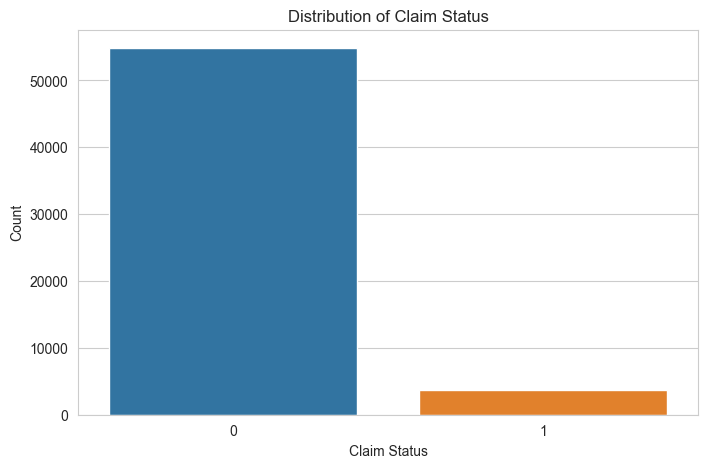

In [10]:
#Next, I will perform exploratory data analysis to visualize and understand the distributions, relationships, and patterns in the data
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

# plot the distribution of the target variable 'claim_status'
plt.figure(figsize=(8, 5))
sns.countplot(x='claim_status', data=df)
plt.title('Distribution of Claim Status')
plt.xlabel('Claim Status')
plt.ylabel('Count')
plt.show()

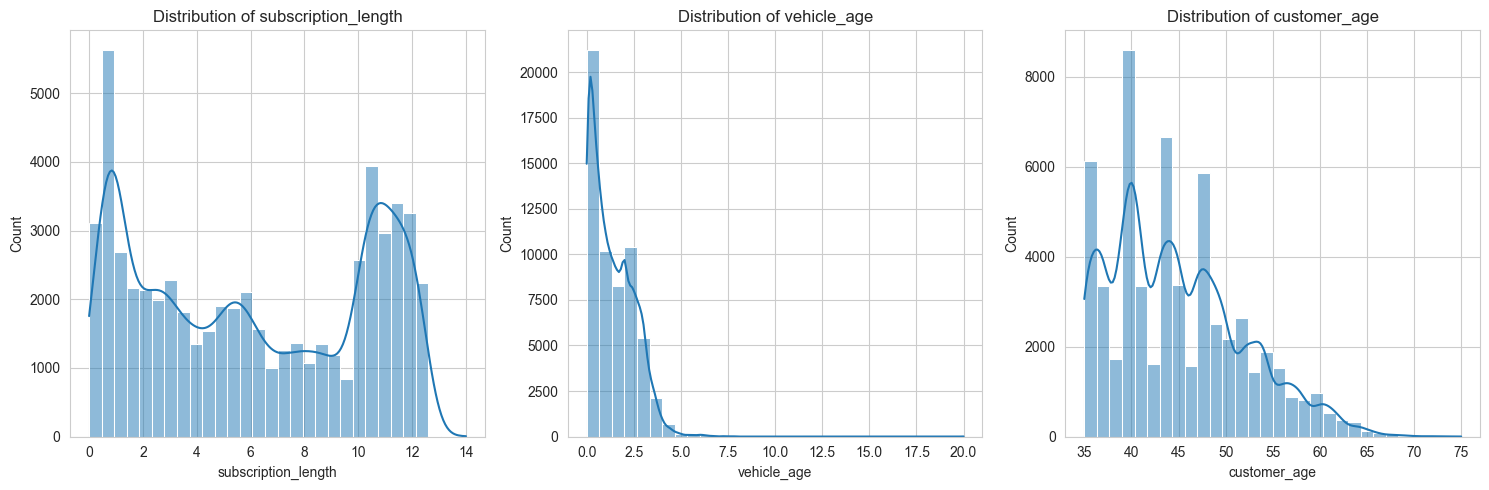

In [14]:
# the distribution of claim_status shows a significant imbalance between the class, with much fewer claims(1) compared to no claims(0).
# selecting numerical columns for analysis
numerical_columns = ['subscription_length', 'vehicle_age', 'customer_age']

# plotting distributions of numerical features
plt.figure(figsize=(15, 5))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(1, 3, i)
    sns.histplot(df[column], bins=30, kde=True)
    plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()

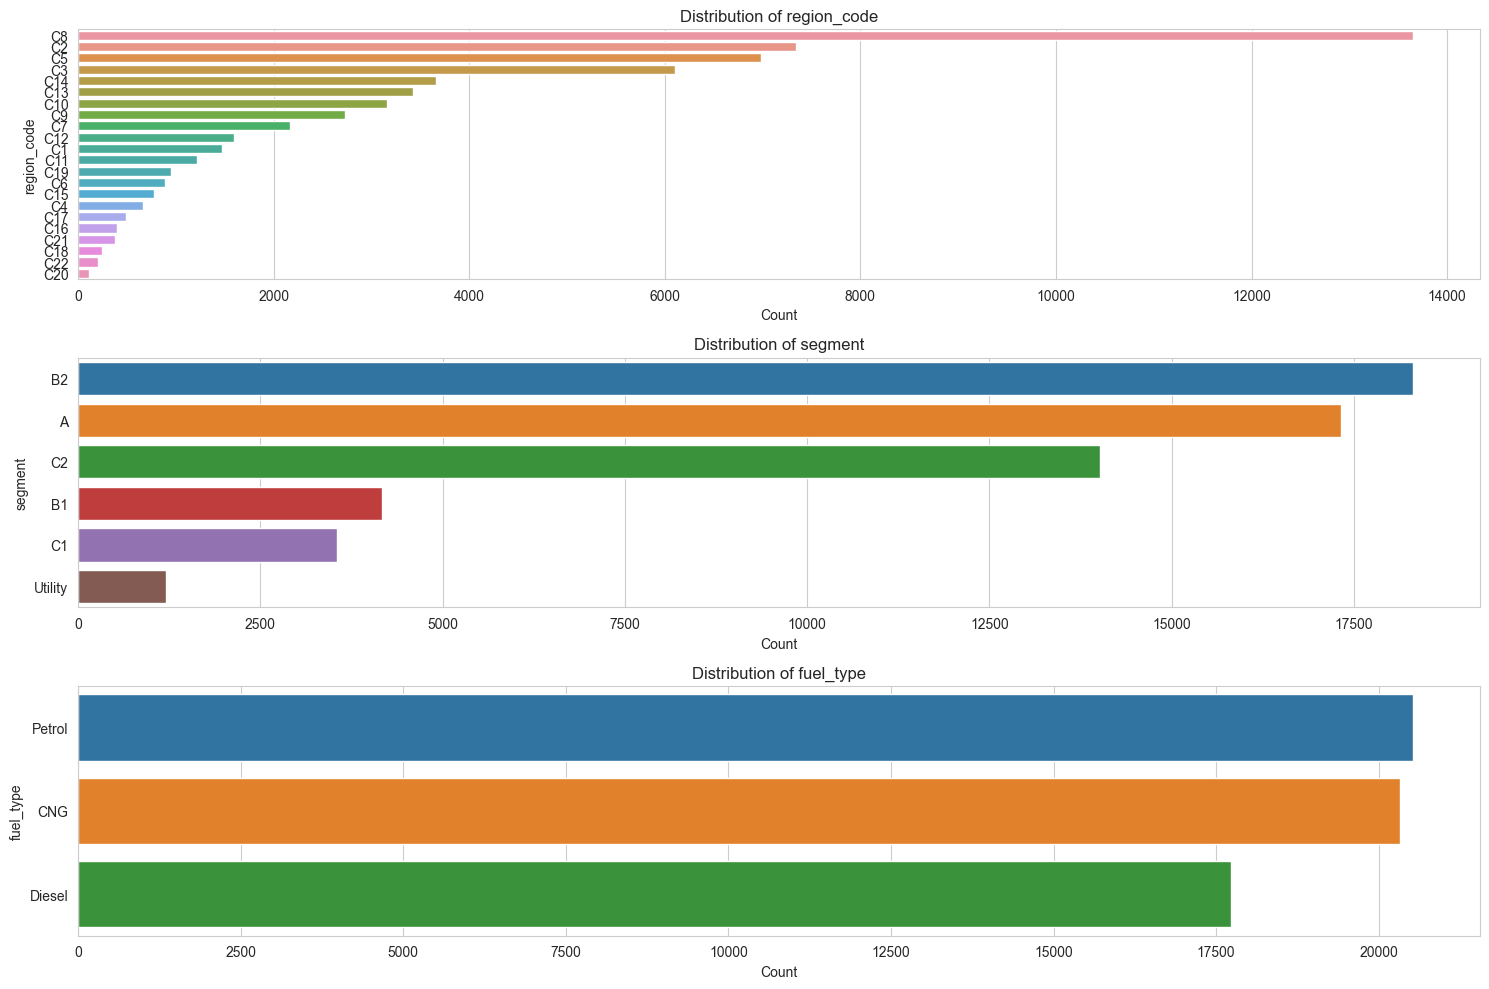

In [17]:
# selecting some relevant categorical columns for analysis
categorical_columns = ['region_code', 'segment', 'fuel_type']

# plotting distributions of categorical features
plt.figure(figsize=(15, 10))
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(3, 1, i)
    sns.countplot(y=column, data=df, order = df[column].value_counts().index)
    plt.title(f'Distribution of {column}')
    plt.xlabel('Count')
    plt.ylabel(column)

plt.tight_layout()
plt.show()

In [41]:
# handling class imbalance
from sklearn.utils import resample

#seperate majority and minority classes
majority = df[df.claim_status == 0]
minority = df[df.claim_status == 1]

#oversample the minority class
minority_oversampled = resample(minority,
                               replace=True,
                               n_samples=len(majority),
                            random_state=42)

#combine majority class with oversampled minorty class
oversampled_data = pd.concat([majority, minority_oversampled])

#chech the distribution of undersampled and oversampled datasets
oversampled_distribution = oversampled_data['claim_status'].value_counts()

oversampled_distribution
#things i learned kde

0    54844
1    54844
Name: claim_status, dtype: int64

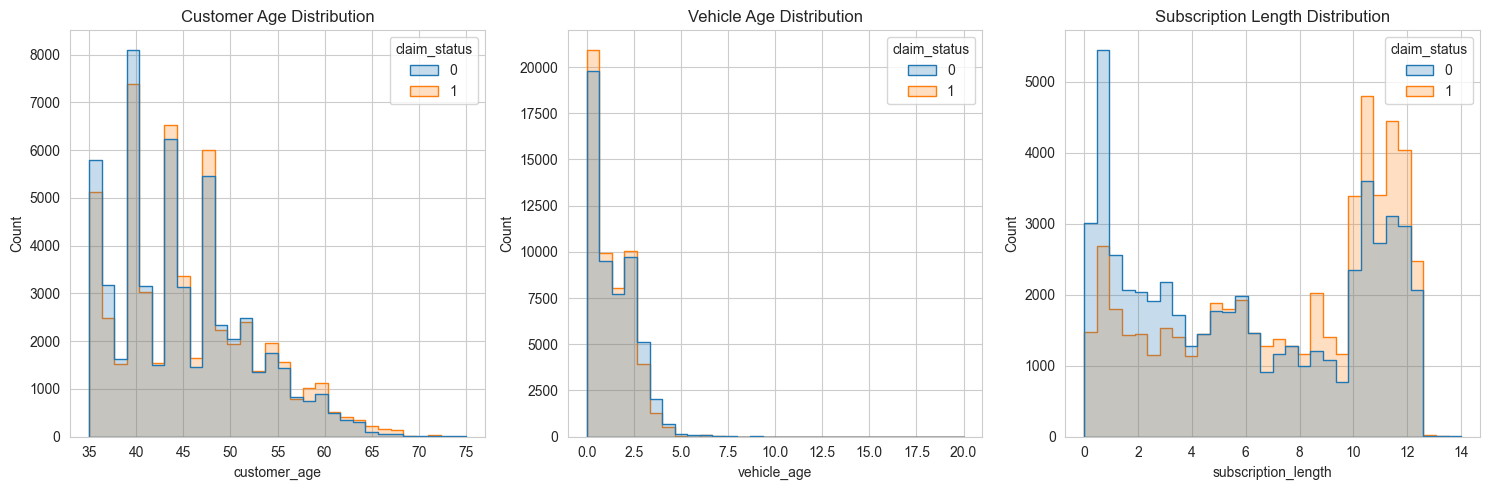

In [22]:
#now lets check our balanced dataset

#plotting the distribution of 'customer_age', 'vehicle_age', and 'subscription_length' with respect to 'claim_status'
plt.figure(figsize=(15,5))

# 'customer_age' distribution
plt.subplot(1, 3, 1)
sns.histplot(data=oversampled_data, x='customer_age', hue='claim_status', element='step', bins=30)
plt.title('Customer Age Distribution')

# 'vehicle_age' distribution
plt.subplot(1, 3, 2)
sns.histplot(data=oversampled_data, x='vehicle_age', hue='claim_status', element='step', bins=30)
plt.title('Vehicle Age Distribution')

# 'subscription_length' distribution
plt.subplot(1, 3, 3)
sns.histplot(data=oversampled_data, x='subscription_length', hue='claim_status', element='step', bins=30)
plt.title('Subscription Length Distribution')

plt.tight_layout()
plt.show()



In [33]:
#Feature Selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

#encode categorical variables
le = LabelEncoder()
encoded_data= df.apply(lambda col: le.fit_transform(col) if col.dtype=='object' else col)

#seperate features and target columns
X=encoded_data.drop('claim_status', axis=1)
y=encoded_data['claim_status']

# create random forest classifier
rf = RandomForestClassifier(random_state=42)
model = rf.fit(X,y)

# get feature importance
feature_importance = model.feature_importances_

In [48]:
# create a dataframe for visualization of feature importance
features_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
features_df = features_df.sort_values(by='Importance', ascending=False)

print(features_df.head(10))  # displaying the top 10 important features

                Feature  Importance
0             policy_id    0.321072
1   subscription_length    0.248309
3          customer_age    0.176639
2           vehicle_age    0.135190
5        region_density    0.053838
4           region_code    0.052649
7                 model    0.000957
24               length    0.000846
26         gross_weight    0.000834
11          engine_type    0.000791


In [55]:
#as we managed to select relevant features we may proceed to train and test our model.
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier

#drop 'Policy_id' column from the data
#oversampled_data = oversampled_data.drop('policy_id', axis=1)

# prepare the oversampled data
X_oversampled = X_oversampled = oversampled_data.drop('claim_status', axis=1)
y_oversampled = oversampled_data['claim_status']

# encoding categorical columns
X_oversampled_encoded = X_oversampled.apply(lambda col: LabelEncoder().fit_transform(col) if col.dtype == 'object' else col)

# splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_oversampled_encoded, y_oversampled, test_size=0.3, random_state=42)

# create and train the Random Forest model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# predictions
y_pred = rf.predict(X_test)

# predictions
y_pred = rf.predict(X_test)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      0.96      0.98     16574
           1       0.96      1.00      0.98     16333

    accuracy                           0.98     32907
   macro avg       0.98      0.98      0.98     32907
weighted avg       0.98      0.98      0.98     32907

